In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [207]:
df= pd.read_csv('googleplaystore.csv')


In [208]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [189]:
df.shape

(10841, 13)

In [190]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [192]:
# check duplicates
df[df.duplicated()] 
print(df.duplicated().sum())

483


In [193]:
df= df.drop_duplicates(keep= 'first') # drop dulicates
df.shape

(10358, 13)

In [194]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [195]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [209]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [210]:
df.drop([10472],inplace=True)

In [211]:
df.iloc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [156]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

<AxesSubplot:>

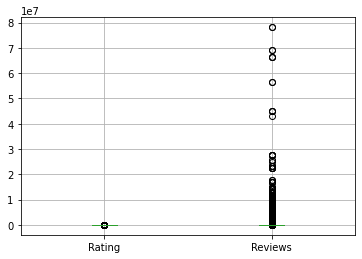

In [157]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

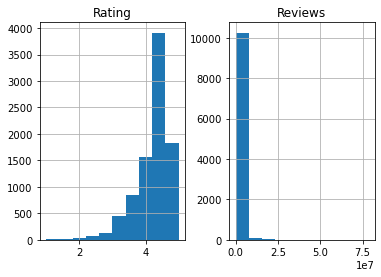

In [158]:
df.hist()

In [159]:
def fillvalue(r):
    return r.fillna(r.median())


In [160]:
df.Rating = df['Rating'].transform(fillvalue)

In [161]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [162]:
d= df['Type'].mode()
d

0    Free
dtype: object

In [165]:
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)


In [166]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [167]:
#App with large number of reviews

df.sort_values('Reviews',ascending=False).iloc[0]['App']

'Facebook'

In [289]:
#Paid Vs Free
Free = len(df[df['Type'] == "Free"])
Paid = len(df[df['Type'] == "Paid"])
print("Free Apps",(Free/(Free+Paid))*100 ,"%")
print("Paid Apps",(Paid/(Free+Paid))*100 ,"%")

Free Apps 92.61924531783376 %
Paid Apps 7.380754682166252 %


In [170]:
vc_rating=df.groupby(['Category','Type']).size()
vc_rating

Category           Type
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Length: 63, dtype: int64

In [104]:
vc_rating = df.Category.value_counts()
vc_rating

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [255]:
df['Price'] = df['Price'].apply(lambda  x : str(x).replace("$", " ") if "$" in str(x) else str(x) )
df['Price'] = df['Price'].apply(lambda  x : float(x))



In [253]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [254]:
rating=df.groupby('App')['Installs'].sum()
rating
#final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

App
"i DT" Fútbol. Todos Somos Técnicos.                    500
+Download 4 Instagram Twitter                       1000000
- Free Comics - Comic Apps                            10000
.R                                                    10000
/u/app                                                10000
                                                     ...   
뽕티비 - 개인방송, 인터넷방송, BJ방송                              100000
💎 I'm rich                                            10000
💘 WhatsLov: Smileys of love, stickers and GIF       1000000
📏 Smart Ruler ↔️ cm/inch measuring for homework!      10000
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    1000000
Name: Installs, Length: 9659, dtype: int64

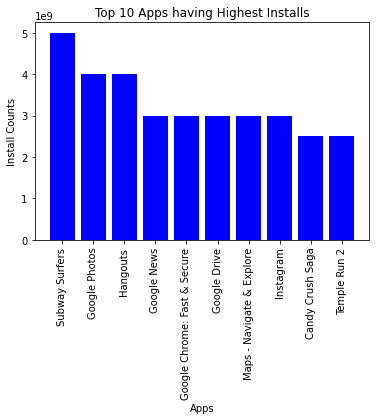

In [177]:
df['Installs'] = df['Installs'].astype(int)
res = df.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)
final_result

plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

In [178]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Text(0, 0.5, 'Size')

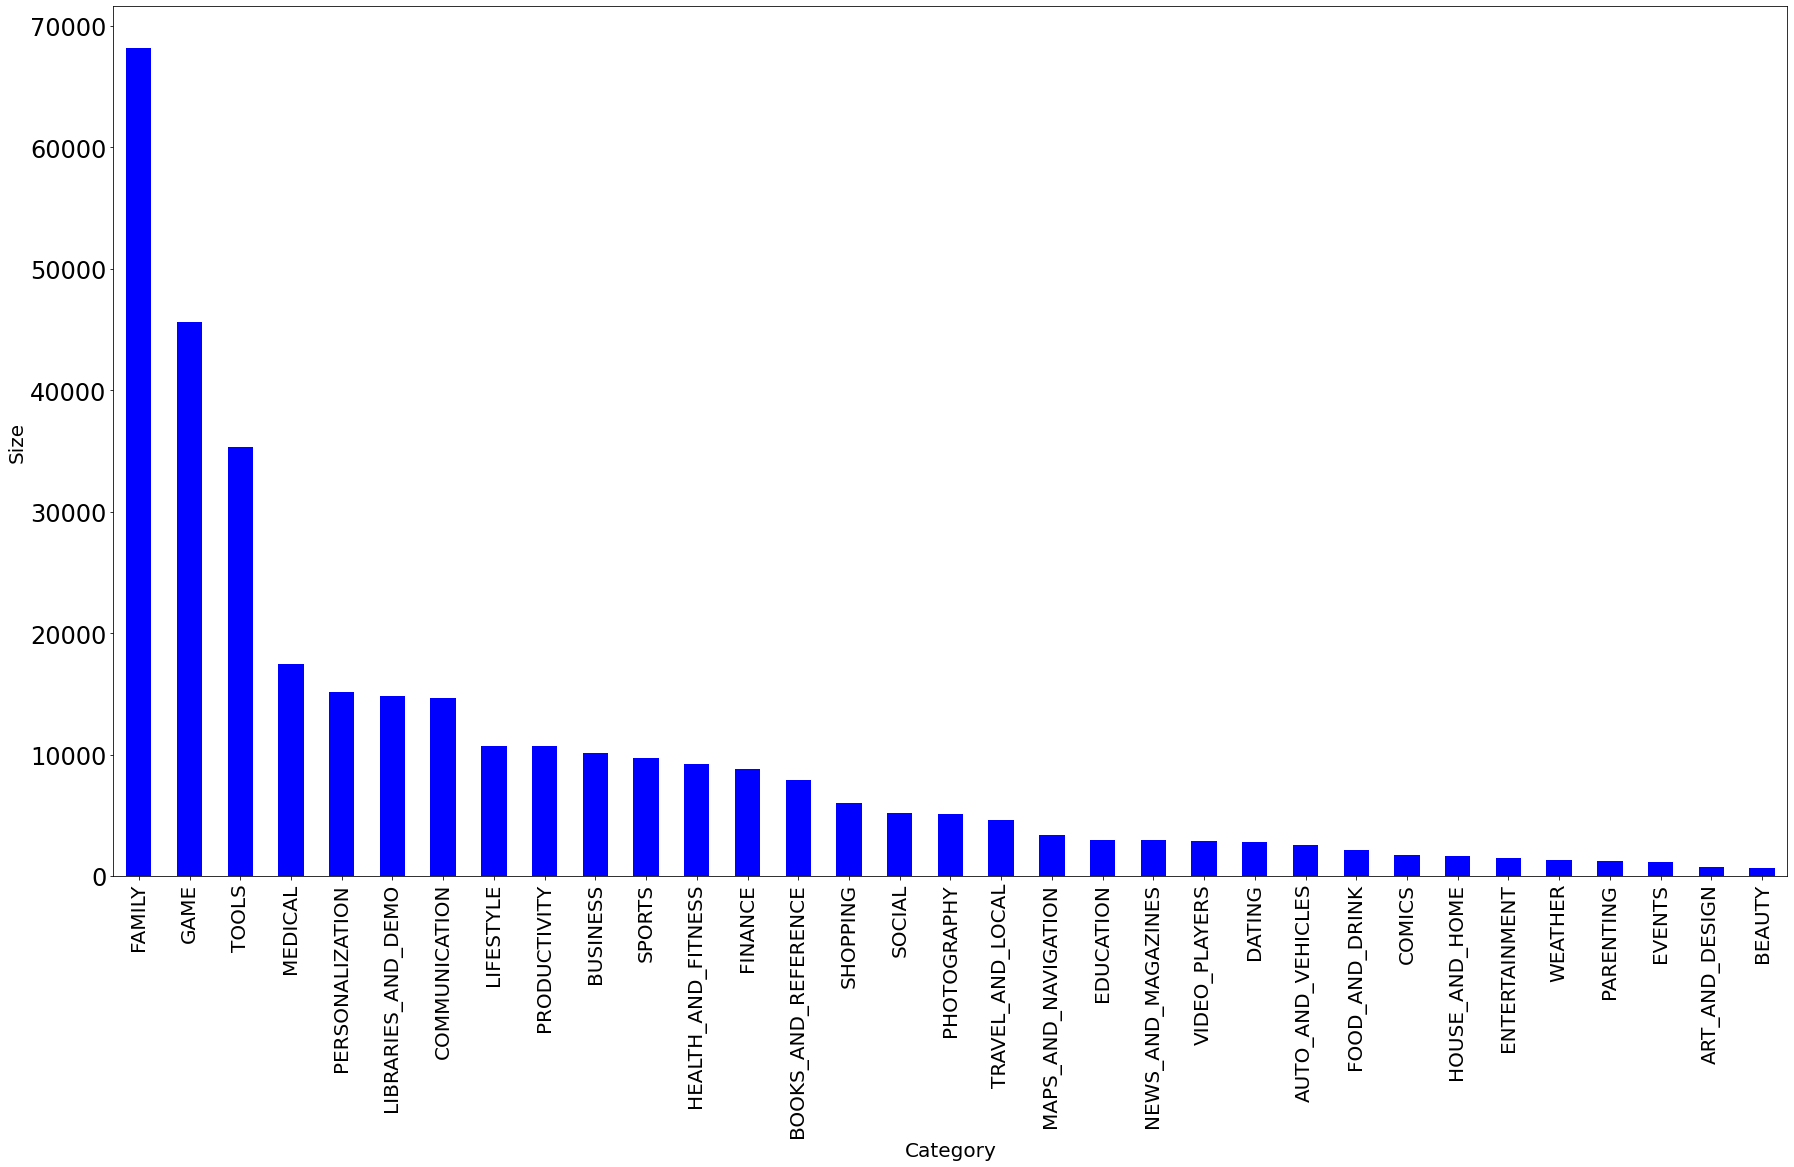

In [179]:
df.loc[df['Size'] == 'Varies with device'].shape
unwanted = df.loc[df['Size'] == 'Varies with device']
unwanted.shape
df.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
res = df.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

In [273]:
grp = df.groupby('Category').size()
grp

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
dtype: int64

Text(0.5, 1.0, 'Count of app in each category')

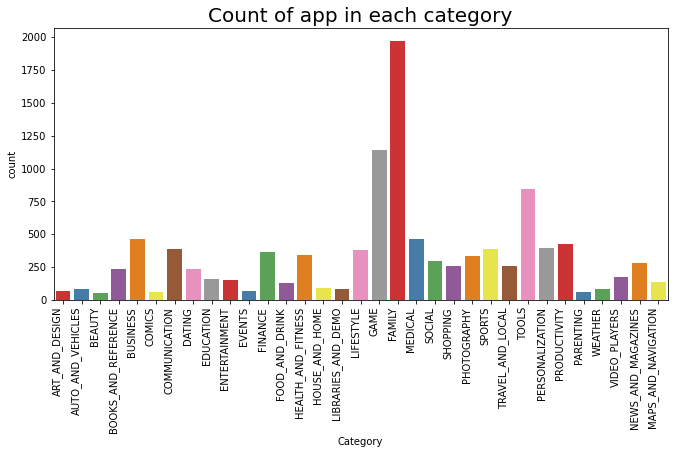

In [281]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 5)
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

In [291]:
df['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [181]:
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.172000
BEAUTY                 4.293617
BOOKS_AND_REFERENCE    4.315816
BUSINESS               4.181266
COMICS                 4.137255
COMMUNICATION          4.139615
DATING                 4.030337
EDUCATION              4.379167
ENTERTAINMENT          4.155224
EVENTS                 4.419298
FAMILY                 4.202381
FINANCE                4.134868
FOOD_AND_DRINK         4.131633
GAME                   4.267100
HEALTH_AND_FITNESS     4.222500
HOUSE_AND_HOME         4.161290
LIBRARIES_AND_DEMO     4.226829
LIFESTYLE              4.132840
MAPS_AND_NAVIGATION    4.048148
MEDICAL                4.211316
NEWS_AND_MAGAZINES     4.182775
PARENTING              4.338889
PERSONALIZATION        4.319492
PHOTOGRAPHY            4.146914
PRODUCTIVITY           4.177592
SHOPPING               4.234254
SOCIAL                 4.266995
SPORTS                 4.228041
TOOLS                  4.052097
TRAVEL_AND_LOCAL       4.075419

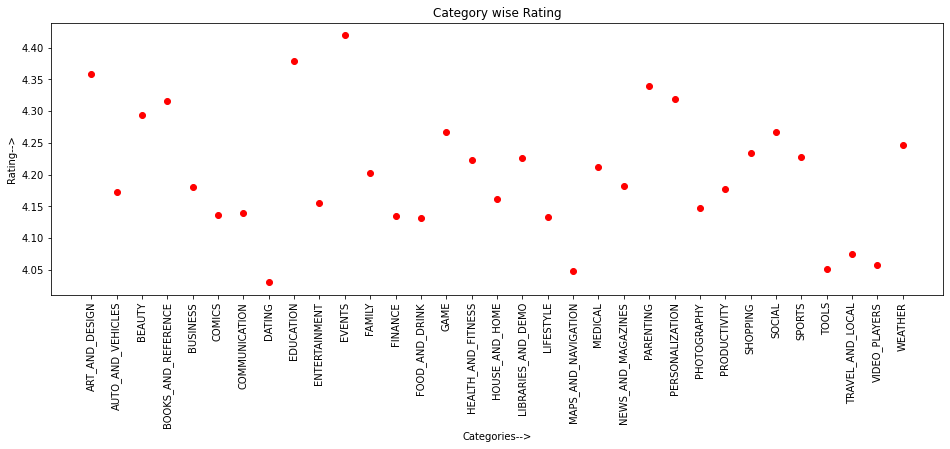

In [182]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()


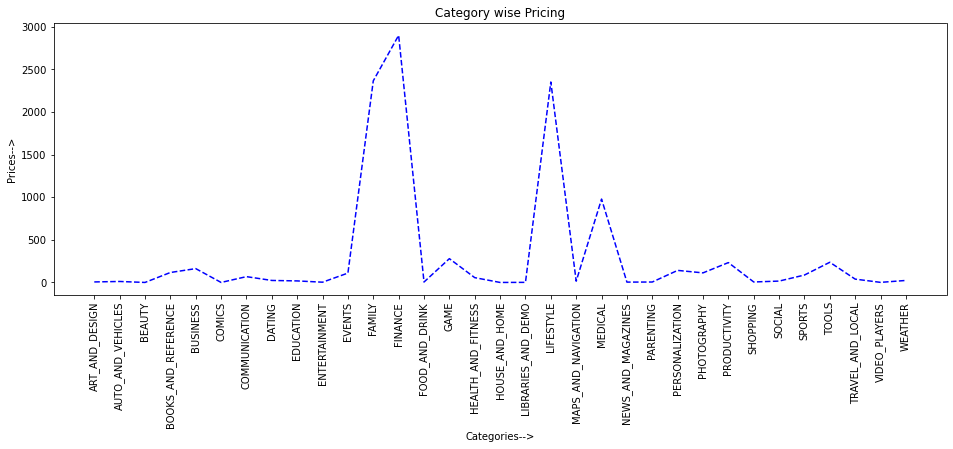

In [183]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

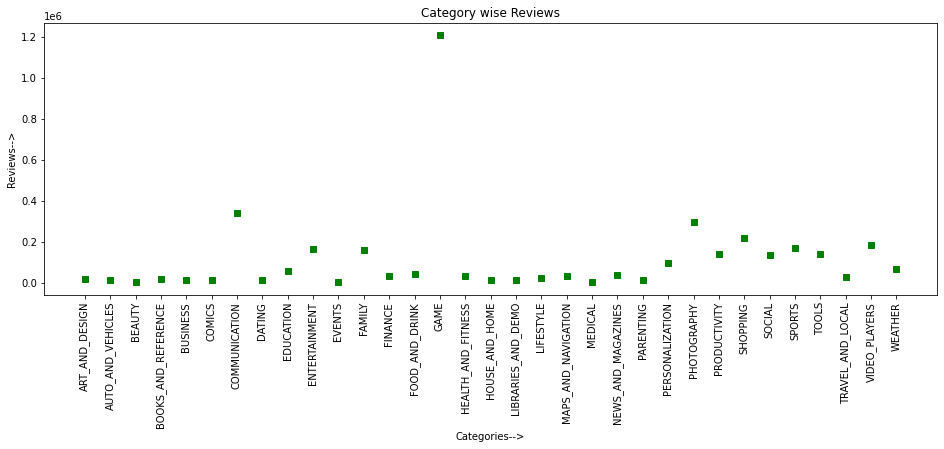

In [184]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

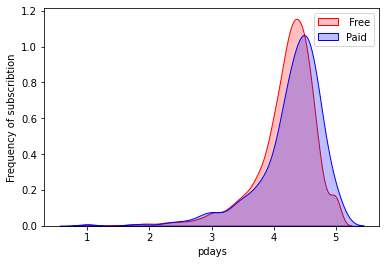

In [238]:
df['Rating']=pd.to_numeric(df.Rating)
ax=sns.kdeplot(df.loc[(df['Type'] == 'Free'),'Rating'],color='r',cbar = True,shade=True,label=' Free')
ax=sns.kdeplot(df.loc[(df['Type'] == 'Paid'),'Rating'],color='b',cbar = True,shade=True,label='Paid' )
plt.ylabel('Frequency of subscribtion',fontsize=10)
plt.xlabel('pdays',fontsize=10)
ax.legend()

In [266]:
Sorted_value = sorted(list(df['Installs'].unique()))
df['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )
sorted(list(df['Installs'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Text(0.5, 1.0, 'Rating VS Installs')

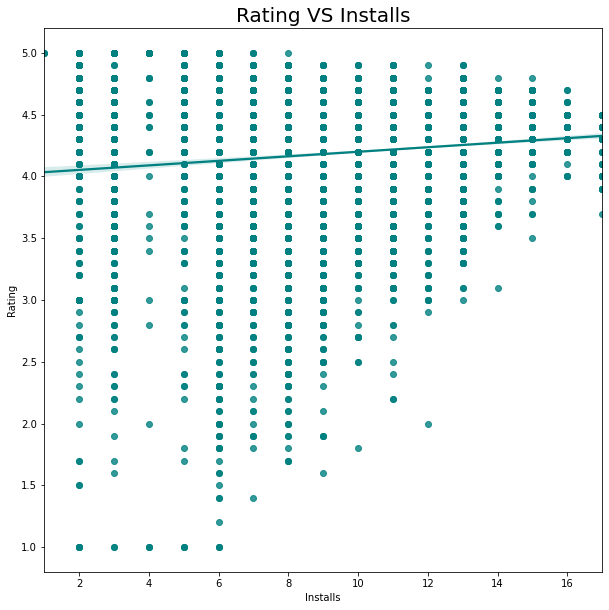

In [267]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df);
plt.title('Rating VS Installs',size = 20)